# EDA 

In [1]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver 
import time
import seaborn as sns 
from Hemnet import preprocessing,hemnet_generator, dep_filter,pct_change_metric
from Scraper import url_extractor , scraper2


from bs4 import BeautifulSoup
import requests
from itertools import chain 
import numpy as np 
import re  

## Loading params

In [2]:
########
#Location codes
########
järfälla_code = 17951
sollentuna_code = 18027
solna_code = 18028
sundbyberg_code = 18042
stockholms_län_code = 18031
vällingby_code =  473464

In [3]:
#############
# Standard Paramters 
#############

min_size = 40
max_size = 60
all_pages = True
pages_size = 5 if all_pages == False else 50 
my_loan = 2500000 
my_future_loan = 3000000

## LOAD DATA SETS

In [8]:
# Last 6 mohts as default 
#hemnet_generator(sold_age = '6m',zone = None,num_pages = 3, keyword = None ,relevant_size = True, min_size=40, max_size=50, max_loan = 2600000): 
#sundbyberg = hemnet_generator(sold_age = '12m',area_code = sundbyberg_code ,num_pages= pages_size,relevant_size= True )
#järfälla = hemnet_generator(sold_age = '12m',area_code = järfälla_code, num_pages= pages_size,relevant_size= True )
#stockholms_län = hemnet_generator(sold_age = '12m',area_code = stockholms_län_code, num_pages= pages_size,relevant_size= True )
#sollentuna = hemnet_generator(sold_age = '12m',area_code = sollentuna_code  ,num_pages= pages_size,relevant_size= True )
#vällingby = hemnet_generator(sold_age = 'all',area_code = vällingby_code,num_pages= pages_size,relevant_size = False)

### Check Vasavägen stats

In [6]:
# all data
vasavägen_all = hemnet_generator(sold_age='all', area_code = järfälla_code , num_pages = pages_size, keyword='Vasavägen' )
vasavägen_6m = hemnet_generator(sold_age='6m', area_code = järfälla_code , num_pages = pages_size, keyword='Vasavägen' )
vasavägen_3m = hemnet_generator(sold_age='3m', area_code = järfälla_code , num_pages = pages_size, keyword='Vasavägen' )

In [10]:
vasavägen_3m.pris_per_m2.mean() * 54

1823060.25

In [11]:
vasavägen_6m.pris_per_m2.mean() * 54

1788724.5882352942

In [12]:
vasavägen_all.pris_per_m2.mean() * 54

1720274.2325581396

In [51]:
# Choose only departaments with similar size 
vasavägen_all2 = vasavägen_all[(vasavägen_all['size'] >= 50) & (vasavägen_all['size'] <= 60) ]
vasavägen_6m2 = vasavägen_6m[(vasavägen_6m['size'] >= 50) & (vasavägen_6m['size'] <= 60) ]
vasavägen_3m2 = vasavägen_3m[(vasavägen_3m['size'] >= 50) & (vasavägen_3m['size'] <= 60) ]


In [64]:
# How were the final price of similar departaments as mine - ALL TIME 
print(f'Mean final price: {vasavägen_all2.slutpris.mean()} , Mean price per m2: {vasavägen_all.pris_per_m2.mean()}, Mean price change: {vasavägen_all.price_change.mean()}')

# Mean final price: 1784117.6470588236 , Mean price per m2: 32772.705882352944, Mean price change: 10.3125

Mean final price: 1808947.3684210526 , Mean price per m2: 31866.886363636364, Mean price change: 9.472222222222221


In [65]:
# How were the final price of similar departaments as mine - 6 months
print(f'Mean final price: {vasavägen_6m2.slutpris.mean()} , Mean price per m2: {vasavägen_6m.pris_per_m2.mean()}, Mean price change: {vasavägen_6m.price_change.mean()}')

# Mean final price: 1754000.0 , Mean price per m2: 32496.2, Mean price change: 9.0

Mean final price: 1813750.0 , Mean price per m2: 32996.0, Mean price change: 7.615384615384615


In [66]:
# How were the final price of similar departaments as mine - 3 months
print(f'Mean final price: {vasavägen_3m2.slutpris.mean()} , Mean price per m2: {vasavägen_3m.pris_per_m2.mean()}, Mean price change: {vasavägen_3m.price_change.mean()}')

# Mean final price: 1850000.0 , Mean price per m2: 33883.0, Mean price change: 3.0

Mean final price: 1897500.0 , Mean price per m2: 33557.42857142857, Mean price change: 4.2


In [ ]:
# It would very good if I could seel the ap for 1 900 000!!!!!!!
# The final price has increased during the last 3 months but it is only one apartament 

In [52]:
vasavägen_all

,gata,city-kommun,type of boende,area,slutpris,pris_per_m2,size,price_change,label
9,Vasavägen 63,Järfälla,Bostadsrättslägenhet,Järfälla,1500000,38961.0,38.5,3.0,possible
49,Vasavägen 29,Järfälla,Bostadsrättslägenhet,Jakobsberg,1995000,34696.0,57.5,NaN,possible
58,Vasavägen 59,Järfälla,Bostadsrättslägenhet,Jakobsberg,1995000,37642.0,53.0,NaN,possible
69,Vasavägen 89,Järfälla,Bostadsrättslägenhet,Jakobsberg,1750000,32051.0,54.6,11.0,possible
272,Vasavägen 89,Järfälla,Bostadsrättslägenhet,Jakobsberg,1300000,35230.0,36.9,3.0,possible
288,Vasavägen 85,Järfälla,Bostadsrättslägenhet,Jakobsberg,1850000,33883.0,54.6,3.0,possible
294,Vasavägen 49,Järfälla,Bostadsrättslägenhet,Jakobsberg,2300000,22439.0,102.5,1.0,possible
515,Vasavägen 55,Järfälla,Bostadsrättslägenhet,Jakobsberg,2150000,28667.0,75.0,2.0,possible
520,Vasavägen 79,Järfälla,Bostadsrättslägenhet,Jakobsberg,1940000,27171.0,71.4,14.0,possible
554,Vasavägen 77,Järfälla,Bostadsrättslägenhet,Jakobsberg,1480000,36098.0,41.0,15.0,possible


In [68]:
# Number of departaments sold the last 3 monts
vasavägen_6m2

,gata,city-kommun,type of boende,area,slutpris,pris_per_m2,size,price_change,label
47,Vasavägen 29,Järfälla,Bostadsrättslägenhet,Jakobsberg,1995000,34696.0,57.5,NaN,possible
56,Vasavägen 59,Järfälla,Bostadsrättslägenhet,Jakobsberg,1995000,37642.0,53.0,NaN,possible
67,Vasavägen 89,Järfälla,Bostadsrättslägenhet,Jakobsberg,1750000,32051.0,54.6,11.0,possible
286,Vasavägen 85,Järfälla,Bostadsrättslägenhet,Jakobsberg,1850000,33883.0,54.6,3.0,possible
601,Vasavägen 85,Järfälla,Bostadsrättslägenhet,Järfälla,1850000,33883.0,54.6,9.0,possible
614,Vasavägen 57,Järfälla,Bostadsrättslägenhet,Jakobsberg,1700000,32075.0,53.0,14.0,possible
630,Vasavägen 81,Järfälla,Bostadsrättslägenhet,Jakobsberg,1590000,29554.0,53.8,14.0,possible
678,Vasavägen 79,Järfälla,Bostadsrättslägenhet,Jakobsberg,1780000,33086.0,53.8,5.0,possible


In [69]:
vasavägen_3m2

,gata,city-kommun,type of boende,area,slutpris,pris_per_m2,size,price_change,label
47,Vasavägen 29,Järfälla,Bostadsrättslägenhet,Jakobsberg,1995000,34696.0,57.5,NaN,possible
56,Vasavägen 59,Järfälla,Bostadsrättslägenhet,Jakobsberg,1995000,37642.0,53.0,NaN,possible
67,Vasavägen 89,Järfälla,Bostadsrättslägenhet,Jakobsberg,1750000,32051.0,54.6,11.0,possible
286,Vasavägen 85,Järfälla,Bostadsrättslägenhet,Jakobsberg,1850000,33883.0,54.6,3.0,possible


In [4]:
price = 1795000
price + (price * 0.07)

1920650.0

## Probability per zone

In [16]:
#############
# Standard Paramters 
#############
min_size = 40
max_size = 60
all_pages = True
pages_size = 5 if all_pages == False else 50 
my_loan = 2600000
my_future_loan = 3000000

### Sollentuna

In [54]:
#####
# Format 
#####
areas =['Edsberg','Tureberg','Norrviken','Helenelund' ,'Edsviken' ,'Törnskogen' , 'Fågelsången','Häggvik','Edsbacka']
for area in areas: 
    sollentuna['area'] = sollentuna['area'].replace(list({i for i in sollentuna['area'] if str(area) in i}), str(area))

In [55]:
sollentuna['area'].unique()    

array(['Tureberg', 'Norrviken', 'Rotebro', 'Silverdal', 'Sollentuna',
       'Helenelund', 'Fågelsången', 'Viby', 'Tegelhagen', 'Edsberg',
       'Töjnan', 'Edsviken', 'Landsnora', 'Törnskogen', 'Kärrdal',
       'Centrala', 'Häggvik', 'Silverdal-Tegelhagen', 'Rotsunda',
       'Rotebro/Sollentuna', 'Sjöberg', 'Edsängen', 'Edsbacka', 'Väsjön',
       'Tunberget', 'Kvarnskogen', 'Solängen', 'Kummelby', 'Bollstanäs',
       'Gillbo', 'Gillberga', 'Vaxmora', 'Kistahöjden', 'Ängstorp',
       'Centralt', 'Rotebro/Gillbo', 'Centrum/Töjnan', 'Skälby',
       'Gillbo/Rotebro', 'villa', 'Hersby', 'Södersättra'], dtype=object)

In [56]:
sollentuna.describe()

,slutpris,pris_per_m2,size,price_change
count,1.100000e+03,1.084000e+03,1084.000000,806.000000
mean,3.838109e+06,4.711372e+04,89.817343,7.178660
std,2.255711e+06,1.164767e+05,43.714534,7.229707
min,2.500000e+05,4.630000e+03,1.000000,1.000000
25%,2.250000e+06,3.422675e+04,62.500000,3.000000
50%,2.995000e+06,4.129150e+04,79.000000,5.000000
75%,4.950000e+06,4.941700e+04,114.000000,9.000000
max,1.410000e+07,3.775000e+06,382.000000,91.000000


In [115]:
sollentuna.head()

,gata,city-kommun,type of boende,area,slutpris,pris_per_m2,size,price_change,label
1,Timotejvägen 13,Sollentuna,Bostadsrättslägenhet,Rotebro,1600000,35955.0,44.5,3.0,possible
9,Vänortsstråket 19,Sollentuna,Bostadsrättslägenhet,Tureberg,1795000,42943.0,41.8,NaN,possible
23,"Rudbecks väg 155, 4tr",Sollentuna,Bostadsrättslägenhet,Landsnora,2800000,51852.0,54.0,NaN,less possible
34,Lomvägen 653,Sollentuna,Bostadsrättslägenhet,Kärrdal,1850000,43529.0,42.5,6.0,possible
42,Vespergränd 81,Sollentuna,Bostadsrättslägenhet,Norrviken,2400000,44860.0,53.5,5.0,possible


In [10]:
loans = [n for n in range(2000000,3100000,100000)]

for loan in loans: 
    print(loan,dep_filter(sollentuna, min_size = min_size, max_size= max_size, max_price = loan ,probas= False))

2000000 There were 56 number of deps sold. The average price change is8.18,the price per square meter is 45590.37, the avg final price is 2216914.29 and the start price in Hemnet could be 1836400.0. The probobability is 32.0 since the total number of deps is 175
2100000 There were 68 number of deps sold. The average price change is8.18,the price per square meter is 45590.37, the avg final price is 2216914.29 and the start price in Hemnet could be 1928220.0. The probobability is 38.86 since the total number of deps is 175
2200000 There were 84 number of deps sold. The average price change is8.18,the price per square meter is 45590.37, the avg final price is 2216914.29 and the start price in Hemnet could be 2020040.0. The probobability is 48.0 since the total number of deps is 175
2300000 There were 105 number of deps sold. The average price change is8.18,the price per square meter is 45590.37, the avg final price is 2216914.29 and the start price in Hemnet could be 2111860.0. The probob

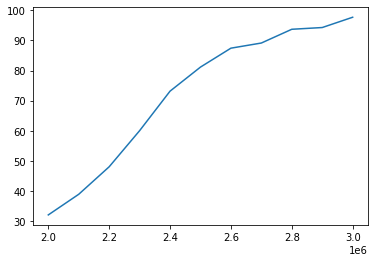

In [117]:
#Visualize 
d ={}
for loan in loans: 
    d[loan] = dep_filter(sollentuna, min_size= min_size, max_size= max_size, max_price = loan ,probas= True)
    
plt.plot(list(d.keys()), list(d.values()) )

In [28]:
# Group by zone 
by_label = pd.DataFrame(sollentuna.groupby(['area','label'])['size'].count()).unstack().fillna(0)

by_label['ratio'] = by_label['size']['possible'] / by_label['size']['less possible'] * 100 

In [29]:
by_label

size                ratio
label                less possible possible            
area                                                   
Bollstanäs                     0.0      1.0         inf
Centrala                      14.0     12.0   85.714286
Centralt                       0.0      0.0         NaN
Centrum/Töjnan                 0.0      1.0         inf
Edsbacka                      13.0      2.0   15.384615
Edsberg                       22.0     98.0  445.454545
Edsviken                      18.0      6.0   33.333333
Edsängen                      16.0     22.0  137.500000
Fågelsången                   13.0      1.0    7.692308
Gillberga                      1.0      0.0    0.000000
Gillbo                         5.0      1.0   20.000000
Gillbo/Rotebro                 1.0      0.0    0.000000
Helenelund                    49.0     42.0   85.714286
Hersby                         1.0      0.0    0.000000
Häggvik                       49.0     35.0   71.428571
Kistahöjden                    2.0      0.0    0.000000
Kummelby                       1.0      0.0    0.000000
Kvarnskogen                    8.0      2.0   25.000000
Kärrdal                       16.0     42.0  262.500000
Landsnora                      8.0      1.0   12.500000
Norrviken                     36.0      6.0   16.666667
Rotebro                       21.0     23.0  109.523810
Rotebro/Gillbo                 3.0      0.0    0.000000
Rotebro/Sollentuna             2.0      1.0   50.000000
Rotsunda                       7.0     21.0  300.000000
Silverdal                     47.0     16.0   34.042553
Silverdal-Tegelhagen           3.0      0.0    0.000000
Sjöberg                       14.0      8.0   57.142857
Skälby                         2.0      0.0    0.000000
Sollentuna                    65.0     47.0   72.307692
Solängen                       6.0      0.0    0.000000
Södersättra                    0.0      0.0         NaN
Tegelhagen                    18.0      3.0   16.666667
Tunberget                      1.0      0.0    0.000000
Tureberg                      49.0     44.0   89.795918
Töjnan                        30.0      0.0    0.000000
Törnskogen                    11.0      0.0    0.000000
Vaxmora                       11.0      1.0    9.090909
Viby                          49.0      4.0    8.163265
Väsjön                        28.0      1.0    3.571429
villa                          2.0      0.0    0.000000
Ängstorp                       1.0      0.0    0.000000

In [84]:
sollentuna[sollentuna['area']=='Edsberg'].describe()

,slutpris,pris_per_m2,size,price_change
count,1.230000e+02,120.000000,120.000000,80.000000
mean,2.285244e+06,36913.758333,68.504167,5.300000
std,8.462547e+05,21108.691806,21.726286,4.004428
min,2.500000e+05,25395.000000,1.000000,1.000000
25%,1.900000e+06,30048.750000,58.000000,2.750000
50%,2.150000e+06,32943.500000,70.000000,4.000000
75%,2.430000e+06,38939.000000,76.500000,7.000000
max,6.350000e+06,250000.000000,122.000000,18.000000


In [30]:
#Gruping by 
by_area = sollentuna.groupby('area').agg({'slutpris': ['mean','min','max','count'] , 'pris_per_m2': ['mean','min','max'] , 'price_change': ['mean','min','max'] })

by_area.style.background_gradient()
# helenelund

In [81]:
price = 2495000
price + (price *0.08)


2694600.0

In [32]:
sollentuna.groupby('area').agg({'pris_per_m2': 'mean', 'slutpris':'count' } ).sort_values(by='slutpris',ascending=False)

,pris_per_m2,slutpris
area,,
Sollentuna,48580.120000,25
Edsberg,39831.958333,24
Häggvik,44266.421053,19
Tureberg,44733.500000,18
Edsängen,46046.866667,15
Silverdal,53906.142857,14
Helenelund,38447.583333,12
Centrala,53562.000000,11
Rotebro,43512.777778,9


### Solna

In [37]:
#####
# Format area 
#####
solna = hemnet_generator(sold_age = '12m',area_code = solna_code ,num_pages = pages_size, relevant_size= True )

areas =['Råsunda','Hagalund','Huvudsta', 'Arenastaden']
for area in areas: 
    solna['area'] = solna['area'].replace(list({i for i in solna['area'] if str(area) in i}), str(area))

In [38]:
solna['area'].unique()

array(['Arenastaden', 'Råsunda', 'Västra', 'Huvudsta', 'Solna',
       'Ulriksdal', 'Frösunda', 'Skytteholm', 'Bergshamra', 'Invid',
       'Järvastaden', 'Rudviken', 'Nya', 'Gamla', 'Haga',
       'Fristaden/Solna', 'Centrala', 'Hagalund', 'Ritorp',
       'Jungfrudansen', 'Solna/Näckrosen', 'i'], dtype=object)

In [32]:
# loans = [n for n in range(2000000,3100000,100000)]

# for loan in loans: 
#     print(loan,dep_filter(solna, min_size= min_size, max_size= max_size, max_price = loan ,probas= False))

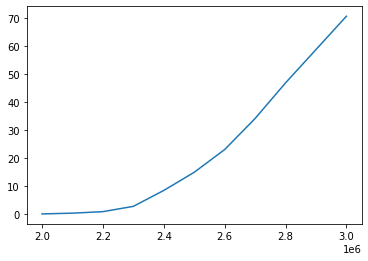

In [63]:
#Visualize 
d ={}
for loan in loans: 
    d[loan] = dep_filter(solna, min_size= min_size, max_size= max_size, max_price = loan ,probas= True)
    
plt.plot(list(d.keys()), list(d.values()) )

Text(0.5, 1.0, 'Green Areas in Solna')

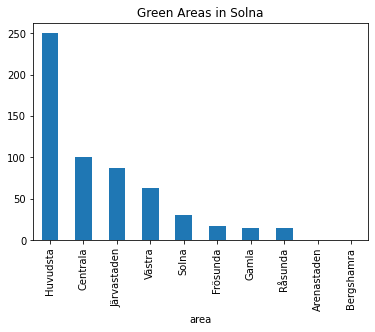

In [33]:
# Group by zone 
by_label = pd.DataFrame(solna.groupby(['area','label'])['size'].count()).unstack()
by_label['ratio'] = by_label['size']['possible'] / by_label['size']['less possible'] * 100 
by_label.sort_values(by= 'ratio', ascending = False).head(10)['ratio'].plot(kind='bar').set_title('Green Areas in Solna')

In [34]:
# Group by zone 
by_label = pd.DataFrame(solna.groupby(['area','label'])['size'].count()).unstack().fillna(0)

by_label['ratio'] = by_label['size']['possible'] / by_label['size']['less possible'] * 100 

In [35]:
by_label

size                ratio
label           less possible possible            
area                                              
Arenastaden              15.0      0.0    0.000000
Bergshamra                5.0      0.0    0.000000
Centrala                  1.0      1.0  100.000000
Fristaden/Solna           0.0      1.0         inf
Frösunda                  6.0      1.0   16.666667
Gamla                     7.0      1.0   14.285714
Haga                      0.0      1.0         inf
Hagalund                  0.0      2.0         inf
Huvudsta                  4.0     10.0  250.000000
Invid                     2.0      0.0    0.000000
Järvastaden               8.0      7.0   87.500000
Nya                       1.0      0.0    0.000000
Ritorp                    0.0      1.0         inf
Rudviken                  4.0      0.0    0.000000
Råsunda                  35.0      5.0   14.285714
Skytteholm                1.0      0.0    0.000000
Solna                    50.0     15.0   30.000000
Ulriksdal                 1.0      0.0    0.000000
Västra                   11.0      7.0   63.636364

In [39]:
by_area = solna.groupby('area').agg({'slutpris': ['mean','min','max','count'] , 'pris_per_m2': ['mean','min','max'] , 'price_change': ['mean','min','max'] })

by_area.style.background_gradient()

### Sundbyberg

In [39]:
#####
# Format area 
#####
areas =['Brotorp','Ursvik', 'Duvbo' ,'Tulemarken']
for area in areas: 
    sundbyberg['area'] = sundbyberg['area'].replace(list({i for i in sundbyberg['area'] if str(area) in i}), str(area))

sundbyberg['area'].unique()    

array(['Ursvik', 'Centrala', 'Lötsjöhöjden', 'Sundbyberg', 'Hallonbergen',
       'Brotorp', 'Lilla', 'Bällsta', 'Bromma', 'Ör', 'Rissne',
       'Järvastaden', 'Rissne/Sundbyberg', 'Råsunda', 'i', 'Duvbo',
       'Stora', 'Bergaliden', 'Signalfabriken', 'Sundbyberg/',
       'Sundbyberg/Hallonbergen/', 'Tulemarken', 'Storskogen',
       'Hallonbergen/', 'Annedal', 'Sundbyberg/Filmstaden', 'Grönkulla',
       'Bällstaån', 'Rissne/', 'Fabriksparken', 'Hästhagen',
       'Solna/Sundbyberg', 'villa', 'Centralt', 'Tuletorget',
       'Sundbyberg/Grönkulla'], dtype=object)

#### General

In [40]:
loans = [n for n in range(2000000,3100000,100000)]

for loan in loans: 
    print(loan,dep_filter(sundbyberg, min_size = min_size, max_size= max_size, max_price = loan ,probas= False))

2000000 There were 18 number of deps sold. The average price change is11.7,the price per square meter is 58101.76, the avg final price is 2886241.44 and the start price in Hemnet could be 1766000.0. The probobability is 4.04 since the total number of deps is 445
2100000 There were 39 number of deps sold. The average price change is11.7,the price per square meter is 58101.76, the avg final price is 2886241.44 and the start price in Hemnet could be 1854300.0. The probobability is 8.76 since the total number of deps is 445
2200000 There were 55 number of deps sold. The average price change is11.7,the price per square meter is 58101.76, the avg final price is 2886241.44 and the start price in Hemnet could be 1942600.0. The probobability is 12.36 since the total number of deps is 445
2300000 There were 75 number of deps sold. The average price change is11.7,the price per square meter is 58101.76, the avg final price is 2886241.44 and the start price in Hemnet could be 2030900.0. The proboba

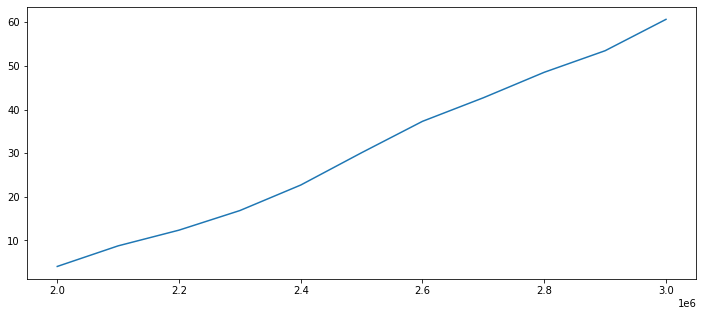

In [41]:
#Visualize 

d ={}
for loan in loans: 
    d[loan] = dep_filter(sundbyberg, min_size= min_size, max_size= max_size, max_price = loan ,probas= True)
plt.figure(figsize=(12,5))    
plt.plot(list(d.keys()), list(d.values()) )

Text(0.5, 1.0, 'Green Areas in Sundbyberg')

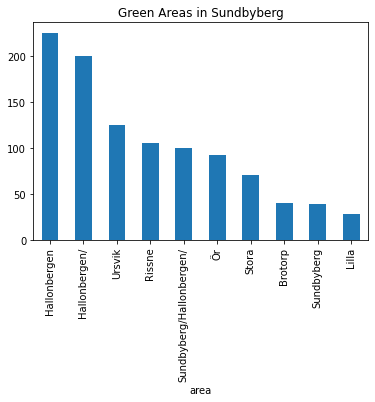

In [42]:
# Group by zone 
by_label = pd.DataFrame(sundbyberg.groupby(['area','label'])['size'].count()).unstack()
by_label['ratio'] = by_label['size']['possible'] / by_label['size']['less possible'] * 100 
by_label.sort_values(by= 'ratio', ascending = False).head(10)['ratio'].plot(kind='bar').set_title('Green Areas in Sundbyberg')

In [43]:
by_label

size                ratio
label                    less possible possible            
area                                                       
Annedal                            2.0      NaN         NaN
Bergaliden                         1.0      NaN         NaN
Bromma                             8.0      1.0   12.500000
Brotorp                           35.0     14.0   40.000000
Bällsta                            6.0      NaN         NaN
Bällstaån                          3.0      NaN         NaN
Centrala                         427.0     84.0   19.672131
Centralt                           NaN      1.0         NaN
Duvbo                             22.0      4.0   18.181818
Fabriksparken                      1.0      NaN         NaN
Grönkulla                          1.0      NaN         NaN
Hallonbergen                      12.0     27.0  225.000000
Hallonbergen/                      2.0      4.0  200.000000
Hästhagen                          1.0      NaN         NaN
Järvastaden                       14.0      3.0   21.428571
Lilla                             61.0     17.0   27.868852
Lötsjöhöjden                       5.0      NaN         NaN
Rissne                            42.0     44.0  104.761905
Rissne/                            NaN      1.0         NaN
Rissne/Sundbyberg                  NaN      1.0         NaN
Råsunda                            1.0      NaN         NaN
Signalfabriken                     2.0      NaN         NaN
Solna/Sundbyberg                   NaN      1.0         NaN
Stora                             10.0      7.0   70.000000
Storskogen                         3.0      NaN         NaN
Sundbyberg                       213.0     82.0   38.497653
Sundbyberg/                        NaN      1.0         NaN
Sundbyberg/Filmstaden              1.0      NaN         NaN
Sundbyberg/Grönkulla               1.0      NaN         NaN
Sundbyberg/Hallonbergen/           1.0      1.0  100.000000
Tulemarken                         6.0      NaN         NaN
Tuletorget                         1.0      NaN         NaN
Ursvik                            68.0     85.0  125.000000
i                                  4.0      1.0   25.000000
villa                              1.0      NaN         NaN
Ör                                12.0     11.0   91.666667

In [44]:
by_area = sundbyberg.groupby('area').agg({'slutpris': ['mean','min','max','count'] , 'pris_per_m2': ['mean','min','max'] , 'price_change': ['mean','min','max'] })

by_area.style.background_gradient()

In [46]:
price = 2200000
price - (price*0.08)





2024000.0

In [123]:
1666 + 500




2166

### Vällingby 

In [32]:
loans = [n for n in range(2000000,3100000,100000)]

for loan in loans: 
    print(loan,dep_filter(vällingby, min_size = min_size, max_size= max_size, max_price = loan ,probas= False))

2000000 There were 148 number of deps sold. The average price change is14.74,the price per square meter is 37962.37, the avg final price is 2080452.44 and the start price in Hemnet could be 1705200.0. The probobability is 38.05 since the total number of deps is 389
2100000 There were 193 number of deps sold. The average price change is14.74,the price per square meter is 37962.37, the avg final price is 2080452.44 and the start price in Hemnet could be 1790460.0. The probobability is 49.61 since the total number of deps is 389
2200000 There were 244 number of deps sold. The average price change is14.74,the price per square meter is 37962.37, the avg final price is 2080452.44 and the start price in Hemnet could be 1875720.0. The probobability is 62.72 since the total number of deps is 389
2300000 There were 295 number of deps sold. The average price change is14.74,the price per square meter is 37962.37, the avg final price is 2080452.44 and the start price in Hemnet could be 1960980.0. T

In [33]:
by_area = vällingby.groupby('area').agg({'slutpris': ['mean','min','max','count'] , 'pris_per_m2': ['mean','min','max'] , 'price_change': ['mean','min','max'] })

by_area.style.background_gradient()

In [34]:
price = 2049948
price - (price *0.14)


1762955.28

### Other areas 

In [18]:
########
# Stockholm 
########

# for loan in loans:
#     print(loan,dep_filter(stockholms_län_code, min_size= min_size, max_size= max_size, max_price = loan,probas= False))

loans = [n for n in range(2000000,3100000,100000)]

for loan in loans: 
    print(loan,dep_filter(stockholms_län , min_size= min_size, max_size= max_size, max_price = loan ,probas= False))      

2000000 There were 17 number of deps sold. The average price change is13.17,the price per square meter is 79165.9, the avg final price is 3501842.97 and the start price in Hemnet could be 1736600.0. The probobability is 4.28 since the total number of deps is 397
2100000 There were 24 number of deps sold. The average price change is13.17,the price per square meter is 79165.9, the avg final price is 3501842.97 and the start price in Hemnet could be 1823430.0. The probobability is 6.05 since the total number of deps is 397
2200000 There were 28 number of deps sold. The average price change is13.17,the price per square meter is 79165.9, the avg final price is 3501842.97 and the start price in Hemnet could be 1910260.0. The probobability is 7.05 since the total number of deps is 397
2300000 There were 36 number of deps sold. The average price change is13.17,the price per square meter is 79165.9, the avg final price is 3501842.97 and the start price in Hemnet could be 1997090.0. The probobab

In [206]:
stockholms_län

,gata,city-kommun,type of boende,area,slutpris,pris_per_m2,size,price_change
0,Sankt Göransgatan 157X,Stockholm,Bostadsrättslägenhet,Västra,2195000,95435.0,23.0,NaN
1,Bastuhagsvägen 57,Stockholm,Bostadsrättslägenhet,Enskede,2880000,60632.0,47.5,15.0
2,"Marieviksgatan 43, 6tr",Stockholm,Bostadsrättslägenhet,Liljeholmskajen,6075000,78896.0,77.0,11.0
3,Liljeörnsgatan 72,Stockholm,Bostadsrättslägenhet,Hässelby,1450000,51786.0,28.0,12.0
4,"Drevergatan 1B, 5 tr",Stockholm,Bostadsrättslägenhet,Norra,8050000,97576.0,82.5,22.0
...,...,...,...,...,...,...,...,...
2495,"Rabattvägen 44, Vån 5",Stockholm,Bostadsrättslägenhet,Vällingby,2450000,41176.0,59.5,13.0
2496,Ruddammsbacken 28,Stockholm,Bostadsrättslägenhet,Ruddammen,3000000,103448.0,29.0,NaN
2497,"Mariehällsvägen 16, vån 2",Stockholm,Bostadsrättslägenhet,Bromma,3500000,61189.0,57.2,NaN
2498,Nykarlebygatan 61,Stockholm,Bostadsrätt,Akalla,2800000,33939.0,82.5,NaN


Text(0.5, 1.0, 'Green Areas in Sundbyberg')

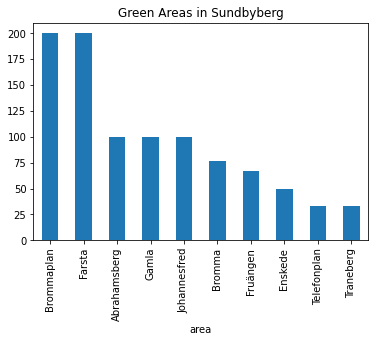

In [19]:
# Group by zone 
by_label = pd.DataFrame(stockholms_län.groupby(['area','label'])['size'].count()).unstack()
by_label['ratio'] = by_label['size']['possible'] / by_label['size']['less possible'] * 100 
by_label.sort_values(by= 'ratio', ascending = False).head(10)['ratio'].plot(kind='bar').set_title('Green Areas in Sundbyberg')

In [20]:
by_label.head(30)

size                ratio
label                      less possible possible            
area                                                         
Abrahamsberg                         1.0      1.0  100.000000
Akalla                               NaN      2.0         NaN
Akalladalen                          NaN      1.0         NaN
Aspudden                             5.0      NaN         NaN
Atlas                                1.0      NaN         NaN
Bagarmossen                          2.0      NaN         NaN
Bandhagen                            NaN      1.0         NaN
Birkastan/Vasastan                   1.0      NaN         NaN
Blåsut                               4.0      NaN         NaN
Bredäng/Mälarhöjden                  NaN      1.0         NaN
Bromma                              13.0     10.0   76.923077
Brommaplan                           1.0      2.0  200.000000
Enskede                              2.0      1.0   50.000000
Enskededalen                         1.0      NaN         NaN
Farsta                               1.0      2.0  200.000000
Fredhäll                             2.0      NaN         NaN
Fridhemsplan                         2.0      NaN         NaN
Fruängen                             3.0      2.0   66.666667
Fruängen-Hägersten                   NaN      1.0         NaN
Gamla                                1.0      1.0  100.000000
Globen                               1.0      NaN         NaN
Gröndal                              3.0      NaN         NaN
Gärdet                               5.0      NaN         NaN
Hagastaden                           1.0      NaN         NaN
Hammarby                             8.0      NaN         NaN
Hammarbyhöjden                       8.0      1.0   12.500000
Hammarbyhöjden/Björkhagen            1.0      NaN         NaN
Hammarbyhöjden/Johanneshov           1.0      NaN         NaN
Hjorthagen                          16.0      NaN         NaN
Hornsbergs                           1.0      NaN         NaN

In [23]:
loans = [n for n in range(2000000,3100000,100000)]

for loan in loans: 
    print(loan,dep_filter(nacka, min_size = min_size, max_size= max_size, max_price = loan ,probas= False))

2000000 There were 33 number of deps sold. The average price change is10.59,the price per square meter is 57162.0, the avg final price is 2606828.95 and the start price in Hemnet could be 1788200.0. The probobability is 21.71 since the total number of deps is 152
2100000 There were 40 number of deps sold. The average price change is10.59,the price per square meter is 57162.0, the avg final price is 2606828.95 and the start price in Hemnet could be 1877610.0. The probobability is 26.32 since the total number of deps is 152
2200000 There were 47 number of deps sold. The average price change is10.59,the price per square meter is 57162.0, the avg final price is 2606828.95 and the start price in Hemnet could be 1967020.0. The probobability is 30.92 since the total number of deps is 152
2300000 There were 55 number of deps sold. The average price change is10.59,the price per square meter is 57162.0, the avg final price is 2606828.95 and the start price in Hemnet could be 2056430.0. The probo

Text(0.5, 1.0, 'Green Areas in Sundbyberg')

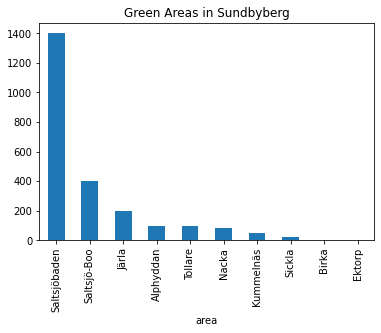

In [24]:
# Group by zone 
by_label = pd.DataFrame(nacka.groupby(['area','label'])['size'].count()).unstack()
by_label['ratio'] = by_label['size']['possible'] / by_label['size']['less possible'] * 100 
by_label.sort_values(by= 'ratio', ascending = False).head(10)['ratio'].plot(kind='bar').set_title('Green Areas in Sundbyberg')

In [25]:
by_label

size                 ratio
label                        less possible possible             
area                                                            
Alphyddan                              2.0      2.0   100.000000
Birka                                  1.0      NaN          NaN
Ektorp                                 NaN      4.0          NaN
Finnboda                               8.0      NaN          NaN
Finntorp                               NaN      5.0          NaN
Hedvigslund                            NaN      2.0          NaN
Henriksdal                             NaN      2.0          NaN
Henriksdalsberget                      NaN      2.0          NaN
Järla                                  1.0      2.0   200.000000
Kummelnäs                              2.0      1.0    50.000000
Kvarnholmen                            5.0      NaN          NaN
Marinstaden                            1.0      NaN          NaN
NACKA                                  1.0      NaN          NaN
Nacka                                 26.0     21.0    80.769231
Neglinge                               NaN      1.0          NaN
Orminge                                NaN      2.0          NaN
Rensättra/Saltsjö                      NaN      1.0          NaN
Saltsjö-Boo                            1.0      4.0   400.000000
Saltsjö-Boo/Lännersta                  1.0      NaN          NaN
Saltsjöbaden                           1.0     14.0  1400.000000
Saltsjöbaden/Ljuskärrsberget           NaN      2.0          NaN
Saltsjöqvarn                           2.0      NaN          NaN
Saltängen                              NaN      1.0          NaN
Sickla                                12.0      3.0    25.000000
Skuru                                  NaN      1.0          NaN
Stensö                                 NaN      1.0          NaN
Strandparksområdet                     NaN      1.0          NaN
Tegelberget                            NaN      1.0          NaN
Telegrafberget                         NaN      1.0          NaN
Tollare                                3.0      3.0   100.000000
Västra                                 NaN      5.0          NaN
Älta                                   NaN      3.0          NaN

In [26]:
by_area = nacka.groupby('area').agg({'slutpris': ['mean','min','max','count'] , 'pris_per_m2': ['mean','min','max'] , 'price_change': ['mean','min','max'] })

by_area.style.background_gradient()

## Testing functions

In [24]:
#######
# Loan loop
#######

def loan_comp(area1, area2, area3, my_loan, my_future_loan):
    plt.figure(figsize=(10,5))
    possible_loans =[n for n in range(my_loan,my_future_loan,80000)]
    d1 = {}
    d2 = {}
    d3 = {}
    for loan in possible_loans:
        d1[loan] = dep_filter(df = area1 ,min_size = min_size, max_size = max_size, max_price = loan, probas=True)
        d2[loan] = dep_filter(df = area2 ,min_size = min_size, max_size = max_size, max_price = loan, probas=True)
        d3[loan] = dep_filter(df = area3 ,min_size = min_size, max_size = max_size, max_price = loan, probas=True)
    title1 = area1['city-kommun'][0] + str(area1.shape[0])
    title2 = area2['city-kommun'][0] + str(area2.shape[0])
    title3 = area3['city-kommun'][0] + str(area3.shape[0])
    plt.plot(list(d1.keys()), list(d1.values()),label=title1)
    plt.plot(list(d2.keys()), list(d2.values()),label=title2)
    plt.plot(list(d3.keys()), list(d3.values()),label=title3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


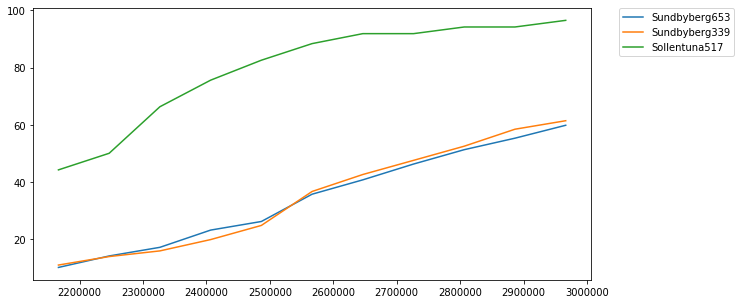

In [25]:
#Sundbyberg
loan_comp(sund_6, sund_3, sollentuna, my_loan, my_future_loan)

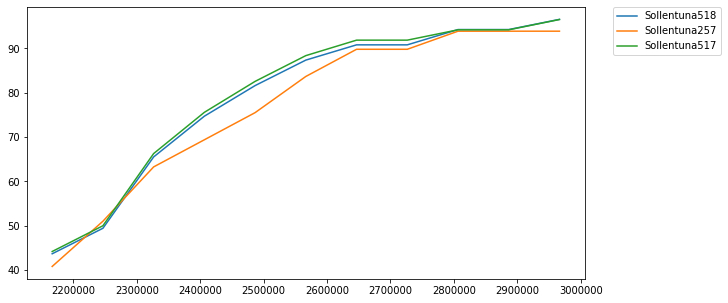

In [27]:
#Sollentuna
loan_comp(soll_6, soll_3, sollentuna, my_loan, my_future_loan)

In [80]:
solna_comp, solna_m6, solna_m3 = pct_change(solna_code)

In [81]:
solna_comp

{'slutpris': -0.3984016529832088,
 'pris_per_m2': -0.8397882161383754,
 'size': 0.8115495349729589,
 'price_change': -6.254551830172894}

In [103]:
dep_filter(solna_m3, min_size = min_size, max_size= max_size, max_price = my_future_loan ,probas= False)

'There were 85 number of deps sold. The average price change is12.39,the price per square meter is 59476.1, the avg final price is 2975577.92 and the start price in Hemnet could be 2628300.0. The probobability is 55.19 since the total number of deps is 154'

In [102]:
solna_m3

,gata,city-kommun,type of boende,area,slutpris,pris_per_m2,size,price_change
0,"Armégatan 29, 5 tr",Solna,Bostadsrättslägenhet,Solna,3200000,46715.0,68.5,NaN
1,Evenemangsgatan 34,Solna,Bostadsrättslägenhet,Arenastaden,3075000,71512.0,43.0,14.0
2,"Fridensborgsvägen 153, 2 tr",Solna,Bostadsrättslägenhet,Järvastaden,2600000,60465.0,43.0,4.0
3,Logdansvägen 42,Solna,Bostadsrättslägenhet,Ör,2200000,32934.0,66.8,19.0
4,"Klippgatan 12A, 7tr",Solna,Bostadsrättslägenhet,Solna,2675000,58152.0,46.0,1.0
...,...,...,...,...,...,...,...,...
525,Tottvägen 5A,Solna,Bostadsrättslägenhet,Gamla,3290000,63269.0,52.0,10.0
526,Råsundavägen 45,Solna,Bostadsrättslägenhet,Solna,2380000,78808.0,30.2,19.0
527,Storgatan 52,Solna,Bostadsrättslägenhet,Solna,2990000,49750.0,60.1,20.0
528,"Fogdevreten 4, 4 tr",Solna,Bostadsrättslägenhet,Solna,1950000,57353.0,34.0,NaN


# Appendix

In [ ]:
#Check floats:
for n in df['size']:
    if type(n) != float: 
        
        print(n)

In [64]:
# Conversion func 1
#Temp solution: func 2
# l = [i.split()[:2] for i in df['pris_per_m2'] ]
# pris_per_m2 = [ int(''.join(i))for i in l]
# len(pris_per_m2) 

In [ ]:
def group (df,g1,metric, mean=True, head= 15):
    if mean:
        return pd.DataFrame(df.groupby(g1)[metric].mean()).sort_values(by=metric,ascending=False).head(head)
    else:
        return pd.DataFrame(df.groupby(g1)[metric].sum()).sort_values(by=metric,ascending=False).head(head)

In [ ]:
#############
#Avg price per m2 per kommun
#############
all_zones = [hammarby_s,sollentuna,solna ,sundbyberg,johhaneshov,kungsholmen,järfälla,väsby]

info = {} 
for idx,zone in enumerate(all_zones):
    p_m2 = round(zone['pris_per_m2'].mean(),2)
    p_c = round(zone['price_change'].mean(),2)
    info.setdefault(idx, []).append([p_m2,p_c]) 
info

# GitHub pull request

In [2]:
import datetime
# 1 Get the current path 
s = ! pwd
current_path = ''
for i in s: 
    current_path+= i
    
# 2 Pull request
! git pull

# 3 Git Push 
now = datetime.datetime.now()
commit_message = "Last run on " + str(now)
! cd current_path 
! echo $commit_message > commit_message.txt
! git add . 
! git commit -F commit_message.txt
! git push origin master # here I choose either master or branch 
print ('Done!')

Already up to date.
/bin/sh: line 0: cd: current_path: No such file or directory
[master 7fc19aa] Last run on 2020-11-01 10:11:02.100429
 Committer: Carlos De la cruz <Tabe@Carloss-MBP-2.lan>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 391 bytes | 391.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://g